In [1]:
results_path = '../../Downloads/results_4_1/results/'

In [78]:
import numpy as np
import pickle
import os
import math
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [89]:
def get_results(pop_size,update_time,case,phrase):
    
    files = os.listdir('{}'.format(results_path))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and 'update_days_{}'.format(update_time) in f and case in f and '2015' not in f]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    regrets = {}
    actions = {}
    for ff in files:
        #sim = int(ff.split('sim_')[1].strip('_continuous_pretreatment_base_coef_scale_hybrid.pkl'))
        #try:
        with open('{}{}'.format(results_path,ff),'rb') as f:
            d = pickle.load(f)
            #return d
            #print(d.keys())
            if len(d)>0:
            #if int(sim)<60:
                #print(len([k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]))
                steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]
                for k,v in d['actions'].items():
                    if k not in actions:
                        actions[k]=v
                    actions[k].extend(v)
            seen = seen+1
           # print(ff)
    print(seen)
    return steps,regrets,actions

In [203]:
def get_results(pop_size,update_time,case,phrase):
    
    files = os.listdir('{}'.format(results_path))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and 'update_days_{}'.format(update_time) in f and case in f and '2015' not in f]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    regrets = {}
    actions = {}
    mus = {}
    for ff in files:
        #sim = int(ff.split('sim_')[1].strip('_continuous_pretreatment_base_coef_scale_hybrid.pkl'))
        #try:
        with open('{}{}'.format(results_path,ff),'rb') as f:
            d = pickle.load(f)
            #return d
            #print(d.keys())
            if len(d)>0:
            #if int(sim)<60:
                #print(len([k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]))
                steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]
                for k,v in d['actions'].items():
                    if k not in actions:
                        actions[k]=v
                    actions[k].extend(v)
            seen = seen+1
           # print(ff)
    print(seen)
    return steps,regrets,actions

In [223]:
peek =  get_results('weighted_poolednewbigtest',7,'case_one','six_weeks_onoise_zero')

KeyboardInterrupt: 

In [140]:

peekbaseline = get_results('personalized',7,'case_one','six_weeks_only_pplus')


In [161]:
peekbaseline['history']['9-2015-09-06 23:30:00']


{'steps': -0.6918954580742975,
 'add': None,
 'action': 0,
 'location': 0,
 'location_1': 0,
 'ltps': -0.6932807709268531,
 'location_2': 0,
 'location_3': 0,
 'study_day': 41,
 'decision_time': False,
 'time': Timestamp('2015-09-06 23:30:00'),
 'avail': True,
 'prob': -1,
 'dow': 1,
 'tod': 2,
 'pretreatment': 0,
 'optimal_reward': -100,
 'optimal_action': -1}

In [196]:
for i in range(50):
    print(peek['history']['{}-2015-09-05 23:30:00'.format(i)]['mu2'])
    print(peek['history']['{}-2015-08-04 23:30:00'.format(i)]['mu2'])
    

[ 0.23997201  0.05170641  0.11049664 -0.30468498  0.24521921]
[ 0.29870267  0.1370807   0.11062126 -0.23253996  0.06880939]
[ 0.16438664  0.05170641  0.11049664 -0.30468498  0.24521921]
[ 0.27512311  0.1370807   0.11062126 -0.23253996  0.06880939]
[ 0.18208291  0.05170641  0.11049664 -0.30468498  0.24521921]
[ 0.24963877  0.1370807   0.11062126 -0.23253996  0.06880939]
[ 0.28915218  0.05170641  0.11049664 -0.30468498  0.24521921]
[ 0.26966898  0.1370807   0.11062126 -0.23253996  0.06880939]
[ 0.07935802  0.05170641  0.11049664 -0.30468498  0.24521921]
[ 0.22995772  0.1370807   0.11062126 -0.23253996  0.06880939]
[ 0.38723613  0.05170641  0.11049664 -0.30468498  0.24521921]
[ 0.29220724  0.1370807   0.11062126 -0.23253996  0.06880939]
[ 0.28458019  0.05170641  0.11049664 -0.30468498  0.24521921]
[ 0.25517487  0.1370807   0.11062126 -0.23253996  0.06880939]
[ 0.1336885   0.05170641  0.11049664 -0.30468498  0.24521921]
[ 0.29932905  0.1370807   0.11062126 -0.23253996  0.06880939]
[ 0.2603

KeyError: '32-2015-09-05 23:30:00'

In [197]:
all_optimal = []
for p in peek['history'].values():  
    if  p['decision_time'] and p['avail']:
        all_optimal.extend([p['optimal_action']  ])


In [198]:
set(all_optimal)

{0, 1}

In [230]:
b , r , a= get_results('weighted_poolednewbigtest',7,'case_one','six_weeks_onoise_zero')

51


In [225]:
np.array(b).mean()

5.069410479245674

In [228]:
np.array(b).mean()

5.059721836638971

In [80]:
b = get_results('personalized',7,'case_one','six_weeks_only_pplus')

51


In [65]:
np.array(b).mean()

5.107622371164358

In [109]:
b,r,abatch = get_results('batch_baseline',7,'case_one','check')

51


In [110]:
np.array(b).mean()

5.13937531871266

In [212]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot

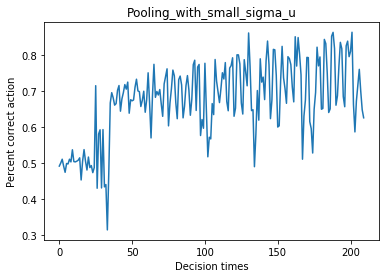

In [233]:
    to_plot = get_to_plot_actions(a)

    plt.ylabel('Percent correct action')
    plt.xlabel('Decision times')
    plt.title('Pooling_with_small_sigma_u')
    plt.plot(to_plot)
    
    plt.savefig('{}_{}_actions.png'.format('Pooling_with_small_sigma_u','weekly_updates'))

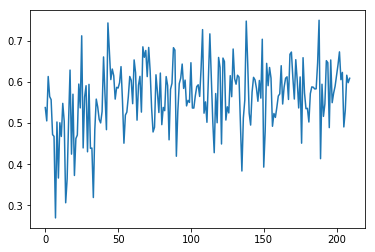

In [82]:
to_plot = get_to_plot_actions(apersonalized)
plt.plot(to_plot)

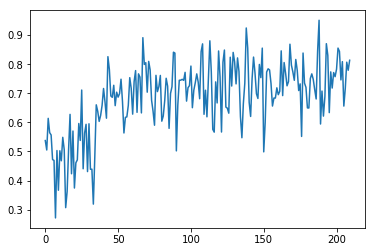

In [111]:
to_plot = get_to_plot_actions(abatch)
plt.plot(to_plot)